## Iris Flower Data Set Project 

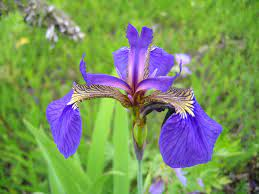 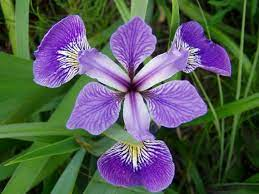 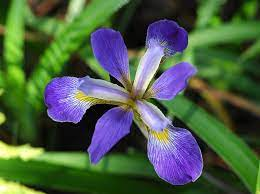

***
Author: Emma Dunleavy

Student Number: g00425660

Module: Fundamentals of Data Analytics Winter 2023/24 

Lecturer: Ian McLoughlin
***

The project is to create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.

- The notebook should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.
- Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.
- Select, demonstrate, and explain the most appropriate plot(s) for each variable.
- The notebook should follow a cohesive narrative about the data set.


***
The Iris Data set contains three species of iris flowers *Setosa*, *Versicolor* and *Virginica* with 50 measurments each of four features 
- petal length
- petal width
- sepal length
- sepal width

### Required Libraries
***

In [127]:
# Graphs.
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss
import statsmodels.api as sm

from sklearn.datasets import load_iris

### Common Variable Types
***

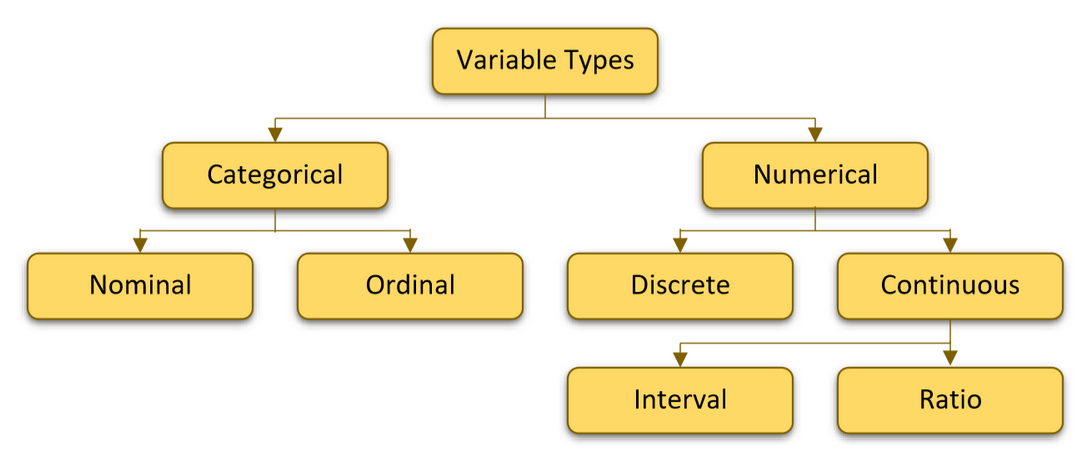

https://www.k2analytics.co.in/statistics-types-of-variables/

### Scales of Measurement
***

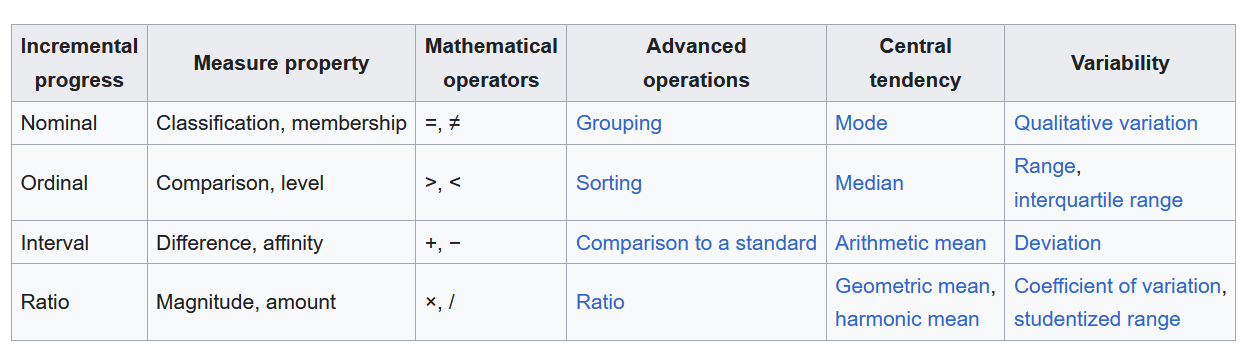

https://en.wikipedia.org/wiki/Level_of_measurement

### Iris Data
***

In [128]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ["sepal_length_in_cm",
            "sepal_width_in_cm",
            "petal_length_in_cm",
            "petal_width_in_cm",
            "class"]

iris_data = pd.read_csv(csv_url, names=col_names) 
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Iris Data Variables
***

 ||sepal_length_in_cm |sepal_width_in_cm |petal_length_in_cm| petal_width_in_cm  |class |
 |---|:---|---|---|---|---|
 |**data type** |float64|float64|float64|float64|object|
 |**variable type level 1**|numerical|numerical|numerical|numerical|categorical|
 |**variable type level 2**|ratio|ratio|ratio|ratio|nominal|

In [129]:
# Show summary statistics for numerical variables.
iris_data.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [130]:
# Show counts for the categorical variable 'class'.
iris_data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [131]:
# Show summary statistic for all variables including the categorical variable 'class' [2].
iris_data.astype('object').describe().transpose()

,count,unique,top,freq
sepal_length_in_cm,150.0,35.0,5.0,10.0
sepal_width_in_cm,150.0,23.0,3.0,26.0
petal_length_in_cm,150.0,43.0,1.5,14.0
petal_width_in_cm,150.0,22.0,0.2,28.0
class,150,3,Iris-setosa,50


array([[<Axes: title={'center': 'sepal_length_in_cm'}>,
        <Axes: title={'center': 'sepal_width_in_cm'}>],
       [<Axes: title={'center': 'petal_length_in_cm'}>,
        <Axes: title={'center': 'petal_width_in_cm'}>]], dtype=object)

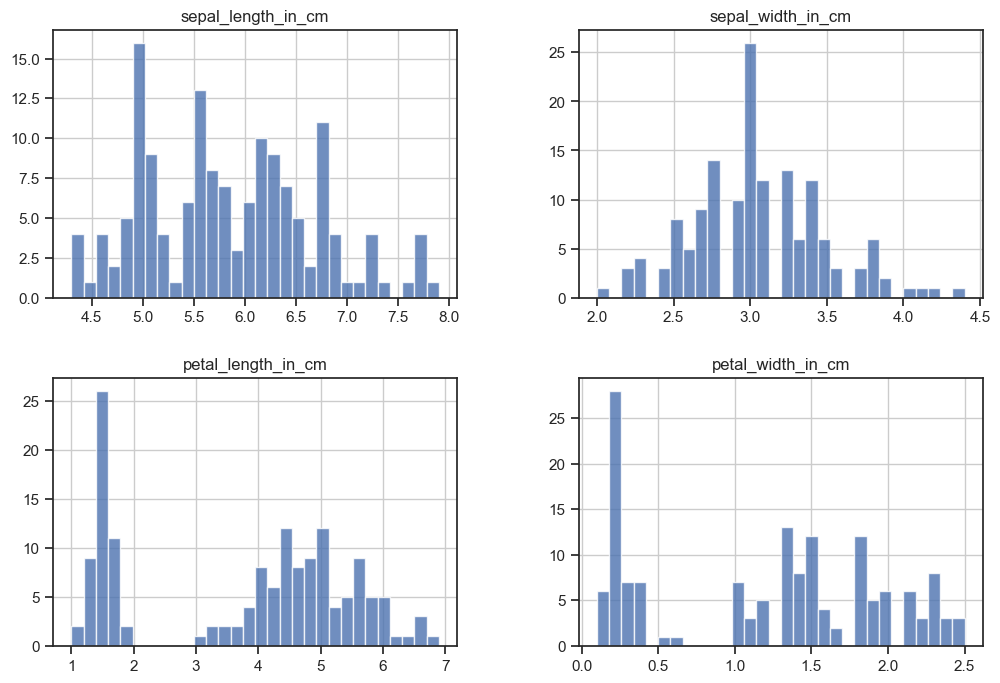

In [132]:
iris_data.hist(alpha=0.8, bins=30, figsize=(12,8))

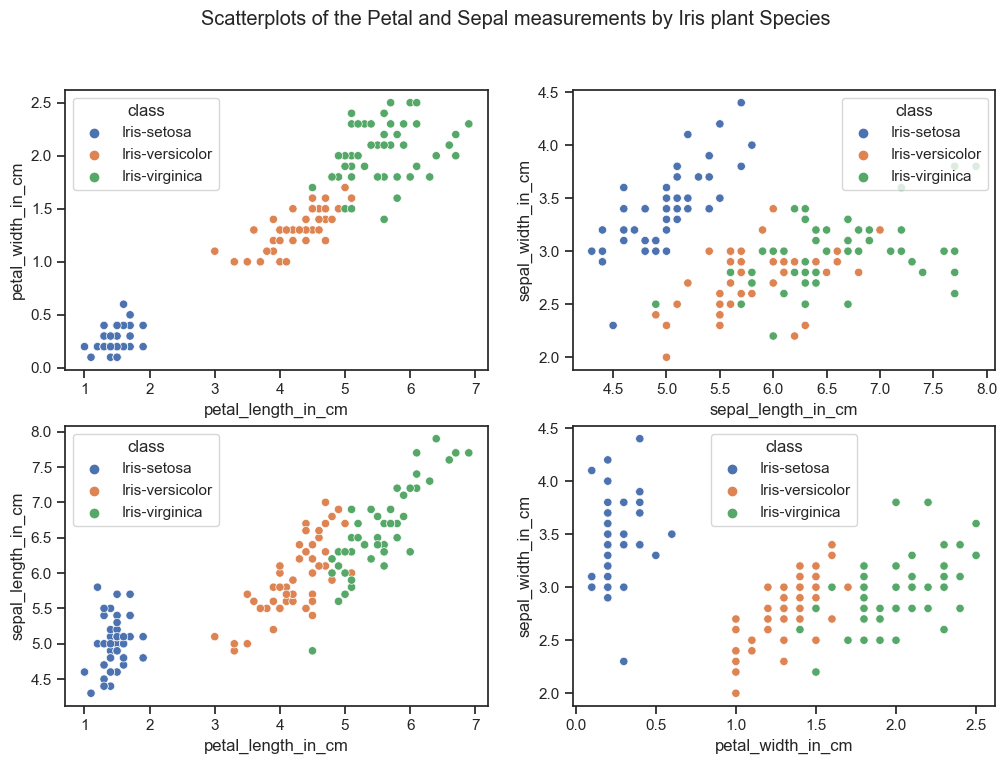

In [133]:
sns.set(style="ticks", palette="deep")
f, axes = plt.subplots(2, 2, sharey=False, figsize=(12, 8))
sns.scatterplot(x="petal_length_in_cm", y="petal_width_in_cm", hue = "class", data=iris_data, ax=axes[0,0])
sns.scatterplot(x="sepal_length_in_cm", y="sepal_width_in_cm", hue = "class", data=iris_data, ax=axes[0,1])
sns.scatterplot(x="petal_length_in_cm", y="sepal_length_in_cm", hue = "class", data=iris_data, ax=axes[1,0])
sns.scatterplot(x="petal_width_in_cm", y="sepal_width_in_cm", hue ="class", data=iris_data, ax=axes[1,1])
f.suptitle("Scatterplots of the Petal and Sepal measurements by Iris plant Species")
plt.show()

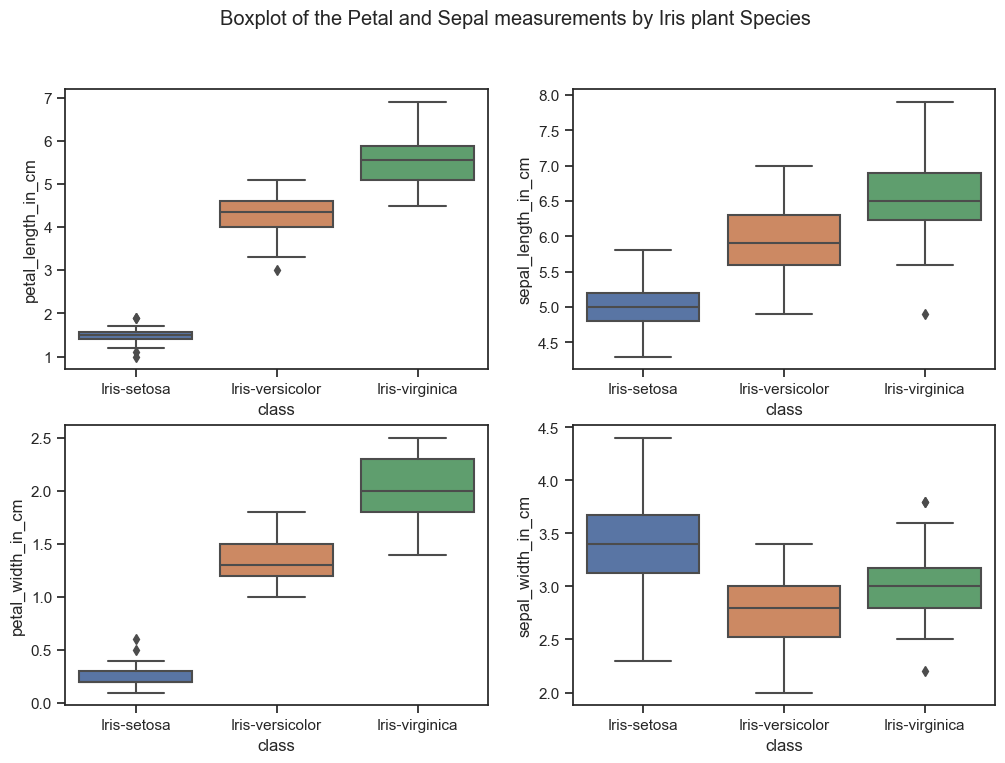

In [134]:
sns.set(style="ticks", palette="deep")
f, axes = plt.subplots(2, 2, sharey=False, figsize=(12, 8))

sns.boxplot(x= "class", y= "sepal_length_in_cm", data=iris_data, ax=axes[0,1])
sns.boxplot(x= "class", y= "sepal_width_in_cm", data=iris_data, ax=axes[1,1])
sns.boxplot(x= "class", y= "petal_length_in_cm", data=iris_data, ax=axes[0,0])
sns.boxplot(x= "class", y= "petal_width_in_cm", data=iris_data, ax=axes[1,0])
f.suptitle("Boxplot of the Petal and Sepal measurements by Iris plant Species")
plt.show()

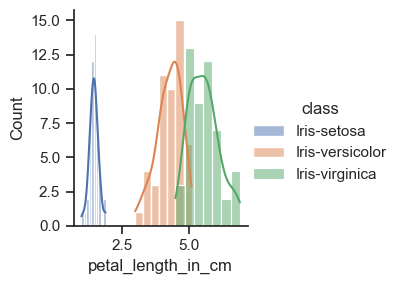

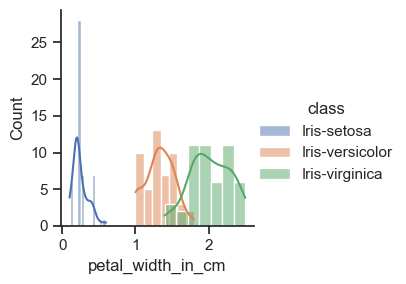

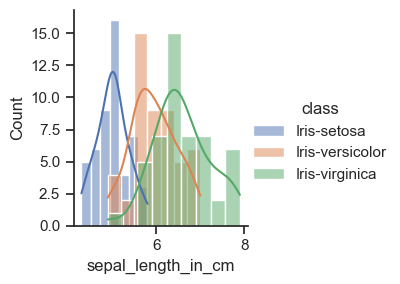

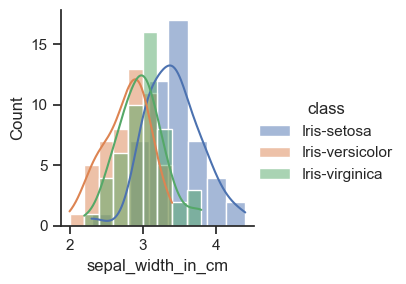

In [135]:
sns.FacetGrid(iris_data,hue="class", palette="deep").map(sns.histplot,"petal_length_in_cm", kde=True, ).add_legend()
sns.FacetGrid(iris_data,hue="class", palette="deep").map(sns.histplot,"petal_width_in_cm", kde=True).add_legend()
sns.FacetGrid(iris_data,hue="class", palette="deep").map(sns.histplot,"sepal_length_in_cm", kde=True).add_legend()
sns.FacetGrid(iris_data,hue="class", palette="deep").map(sns.histplot,"sepal_width_in_cm", kde=True).add_legend()
plt.show()

In [136]:
iris_setosa=iris_data.loc[iris_data["class"]=="Iris-setosa"]
iris_virginica=iris_data.loc[iris_data["class"]=="Iris-virginica"]
iris_versicolor=iris_data.loc[iris_data["class"]=="Iris-versicolor"]

In [137]:
iris_setosa.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [138]:
iris_virginica.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [139]:
iris_versicolor.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [140]:
iris_data=iris_data[['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm','petal_width_in_cm']]

Q-Q Plot to observe the normallity of the variables. If the points fall on the line then it is a normal distribution. The value of this statistic tends to be high (close to 1) for samples drawn from a normal distribution.

<Figure size 1600x600 with 0 Axes>

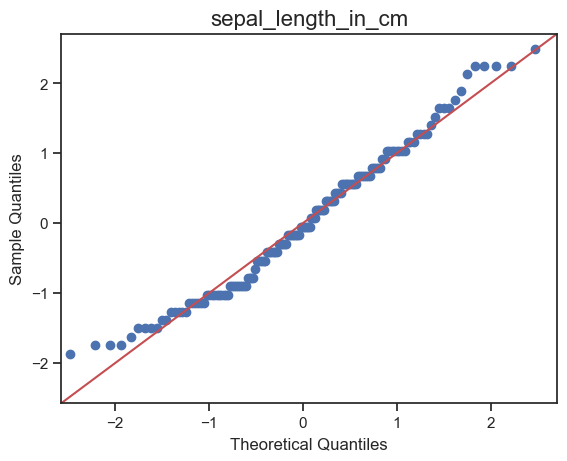

<Figure size 1600x600 with 0 Axes>

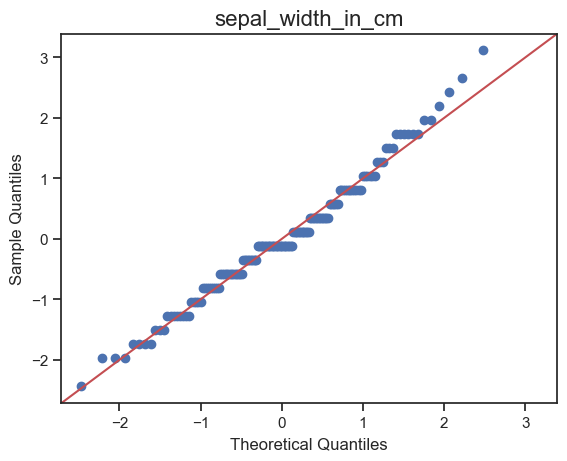

<Figure size 1600x600 with 0 Axes>

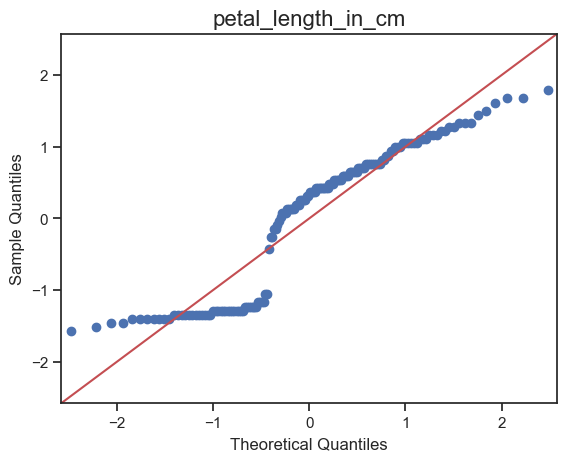

<Figure size 1600x600 with 0 Axes>

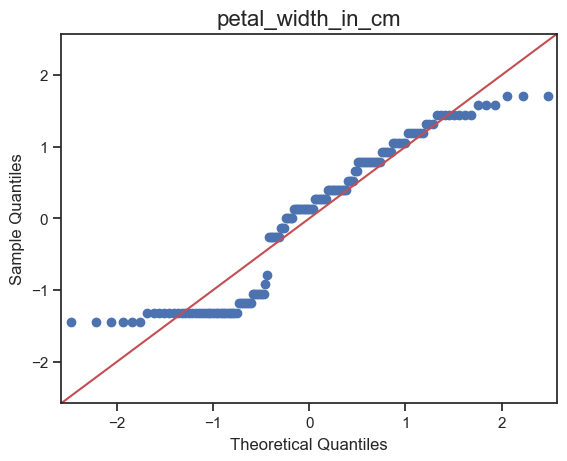

In [141]:
# normal qqplot against normal distribution
for col in iris_data.columns:
    plt.figure(figsize=(16, 6))
    sm.qqplot(iris_data[col], line='45', fit=True)
    plt.title(col, size=16)
    plt.show()

In [142]:
setosa_petal_length = iris_setosa['petal_length_in_cm'].to_numpy()
setosa_petal_width = iris_setosa['petal_width_in_cm'].to_numpy()
setosa_sepal_length = iris_setosa['sepal_length_in_cm'].to_numpy()
setosa_sepal_width = iris_setosa['sepal_width_in_cm'].to_numpy()
virginica_petal_length = iris_virginica['petal_length_in_cm'].to_numpy()
virginica_petal_width = iris_virginica['petal_width_in_cm'].to_numpy()
virginica_sepal_length = iris_virginica['sepal_length_in_cm'].to_numpy()
virginica_sepal_width = iris_virginica['sepal_width_in_cm'].to_numpy()
versicolor_petal_length = iris_versicolor['petal_length_in_cm'].to_numpy()
versicolor_petal_width = iris_versicolor['petal_width_in_cm'].to_numpy()
versicolor_sepal_length = iris_versicolor['sepal_length_in_cm'].to_numpy()
versicolor_sepal_width = iris_versicolor['sepal_width_in_cm'].to_numpy()

In [143]:
var=[setosa_petal_length, setosa_petal_width, setosa_sepal_length, setosa_sepal_width, virginica_petal_length, virginica_petal_width, virginica_sepal_length, virginica_sepal_width, versicolor_petal_length, versicolor_petal_width, versicolor_sepal_length, versicolor_sepal_width]

In [144]:
def my_function(var):
    for label, data in zip(["setosa_petal_length", "setosa_petal_width", "setosa_sepal_length", "setosa_sepal_width", "virginica_petal_length", "virginica_petal_width", "virginica_sepal_length", "virginica_sepal_width", "versicolor_petal_length", "versicolor_petal_width", "versicolor_sepal_length", "versicolor_sepal_width"], var):
        res = ss.shapiro(data)
        result = res.statistic
        print(f"The Shapiro-Wilk test result for normality is {result} for the data: {label}")
        
my_function(var)    

The Shapiro-Wilk test result for normality is 0.9549456834793091 for the data: setosa_petal_length
The Shapiro-Wilk test result for normality is 0.8138164281845093 for the data: setosa_petal_width
The Shapiro-Wilk test result for normality is 0.9776982069015503 for the data: setosa_sepal_length
The Shapiro-Wilk test result for normality is 0.9686915278434753 for the data: setosa_sepal_width
The Shapiro-Wilk test result for normality is 0.9621864557266235 for the data: virginica_petal_length
The Shapiro-Wilk test result for normality is 0.9597713351249695 for the data: virginica_petal_width
The Shapiro-Wilk test result for normality is 0.9711793661117554 for the data: virginica_sepal_length
The Shapiro-Wilk test result for normality is 0.9673907160758972 for the data: virginica_sepal_width
The Shapiro-Wilk test result for normality is 0.9660043120384216 for the data: versicolor_petal_length
The Shapiro-Wilk test result for normality is 0.947626531124115 for the data: versicolor_petal_wi

In [145]:
def normal_pdf(x, mu=0.0, sigma=1.0):
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

In [146]:
normal_pdf(0.0)

0.3989422804014327

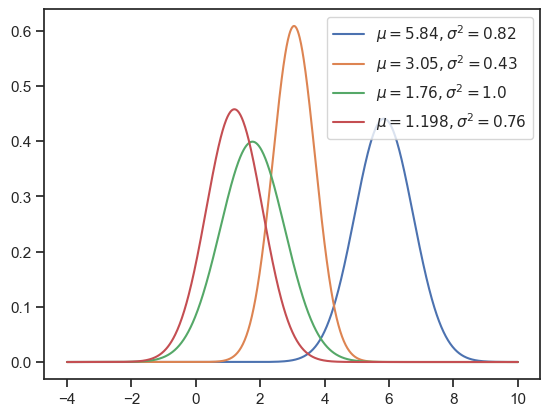

In [147]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-4.0, 10.0, 1001)

# Plot various values for pdf.
for mu, sigma2 in [[5.84, 0.82], [3.05, 0.43], [1.76, 1.0], [1.198, 0.76]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add a legend.
ax.legend()


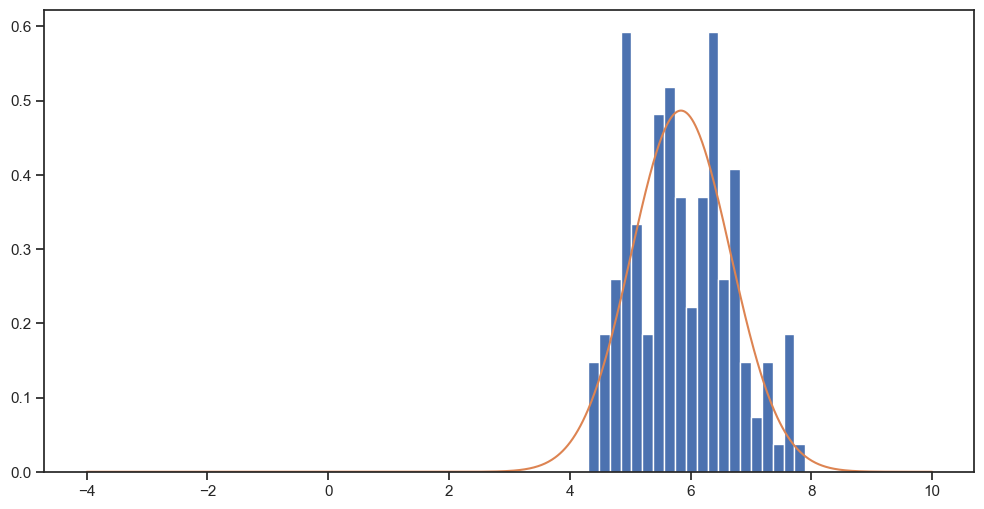

In [148]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 6))

d1 = iris_data['sepal_length_in_cm']

# Plot a histogram.
ax.hist(x=iris_data['sepal_length_in_cm'], bins=20, density=True)
y = normal_pdf(x, mu=5.84, sigma= 0.82)
ax.plot(x, y)

the four common scales of measurement: nominal, ordinal, interval and ratio.

• Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

• Select, demonstrate, and explain the most appropriate plot(s) for each variable.

• The notebook should follow a cohesive narrative about the data set.

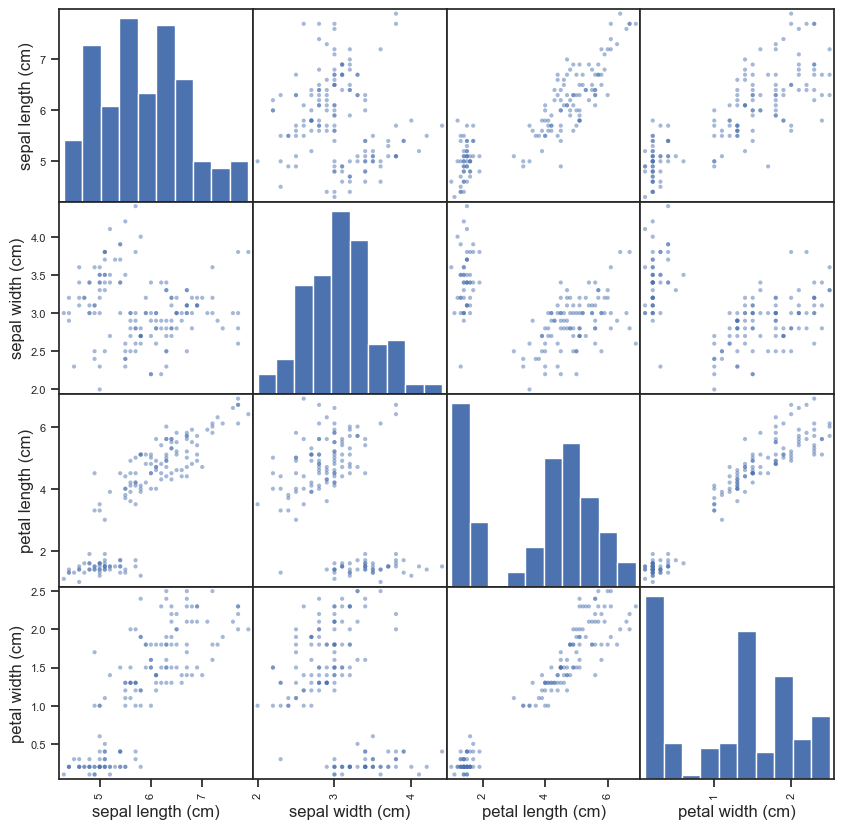

In [149]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

iriss = load_iris()
df_iris = pd.DataFrame(iriss.data, columns=iriss.feature_names)

scatter_matrix(df_iris,figsize=(10,10))
plt.show()

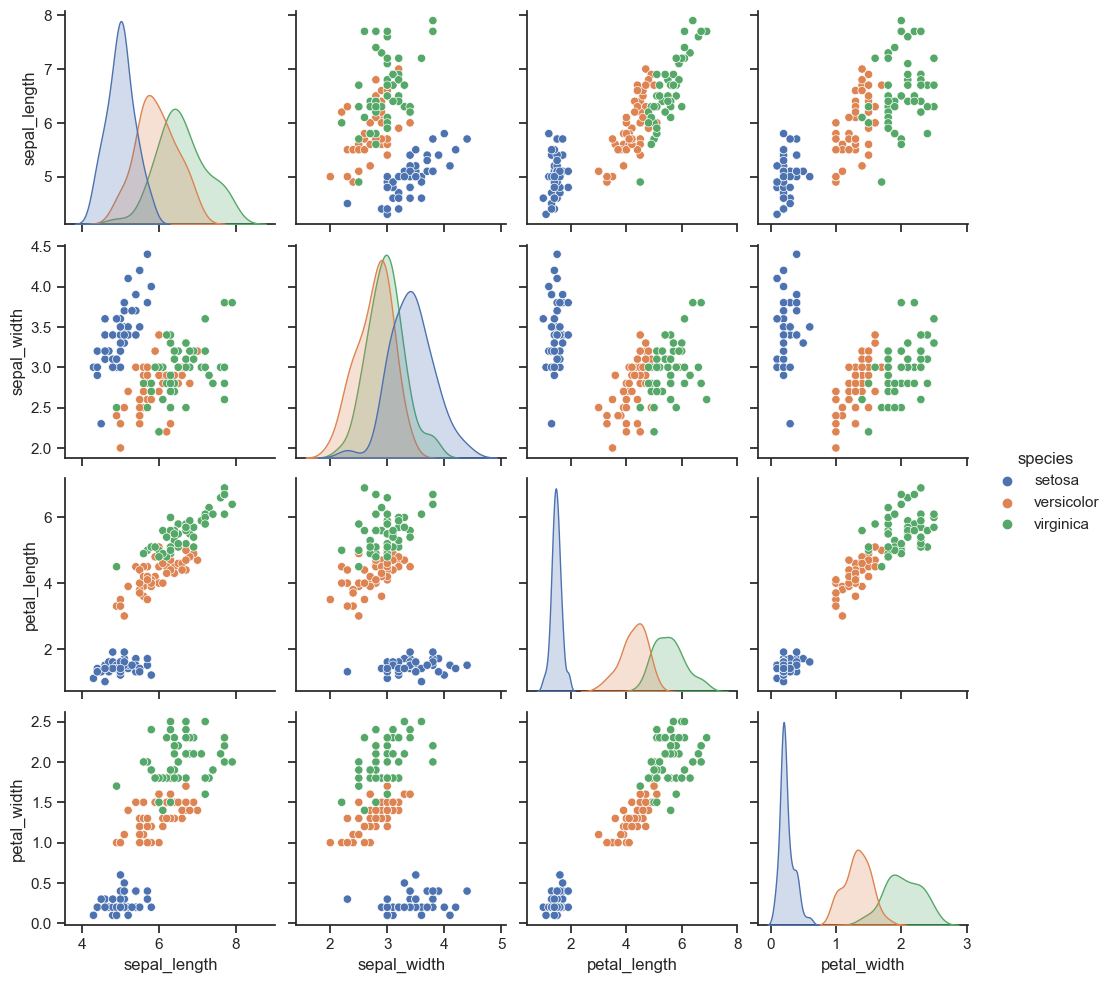

In [150]:

sns.set(style="ticks", color_codes=True)
dfiris = sns.load_dataset("iris")
sns.pairplot(dfiris, hue="species")

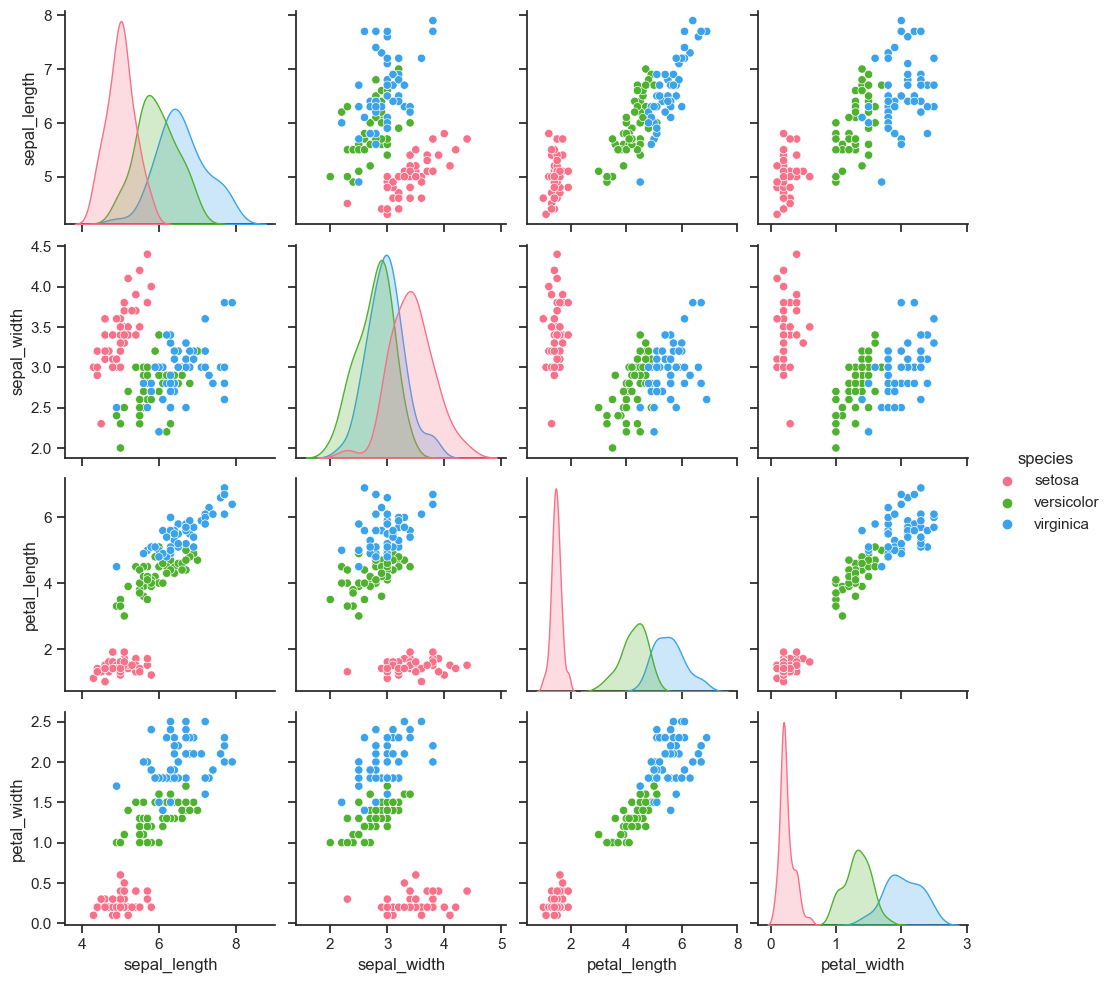

In [151]:
sns.set(style="ticks", color_codes=True)
dfiris = sns.load_dataset("iris")
sns.pairplot(dfiris, hue="species", palette="husl")

## References

[1] Iris – UCI Machine Learning Repository. Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris
(visited on 08/17/2023).

[2] Stack Overflow. (n.d.). Descriptive statistics for categorical variables in Python Pandas. [online] Available at: https://stackoverflow.com/questions/64315768/descriptive-statistics-for-categorical-variables-in-python-pandas [Accessed 08 Nov 2023].

Naveen (2023). Scikit learn Python Tutorial. [online] Intellipaat Blog. Available at: https://intellipaat.com/blog/tutorial/python-tutorial/scikit-learn-tutorial/. [Accessed 08 Nov 2023].

262588213843476 (n.d.). A guide to replacing the deprecated `seaborn.distplot` function. [online] Gist. Available at: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751.

Avuluri, V.S.R. (2019). Exploratory Data Analysis of IRIS Data Set Using Python. [online] Medium. Available at: https://medium.com/@avulurivenkatasaireddy/exploratory-data-analysis-of-iris-data-set-using-python-823e54110d2d.

Scipy.org. (2011). scipy.stats.shapiro — SciPy v1.3.0 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html.

‌

‌

***
## End
